# YAP Jupyter Interface ![yap.ico](attachment:yap.ico)

## Walkthrough and User Guide

The next cells show examples  of input output interaction with Prolog and Jupyter. We assume basic knowledge of both Prolog and Python/R/Jupyter. Notice that this is experimental software, subject to bugs and change. Also remember that 
  - all cells in the same page belong to the same process;
  - _magic_ refers to annotations that perform extra, non-trivial work
  - check the top=right ball right to the side of `YAP 6`: if empty the system is avsilable; otherwise, it is busy, 

### Basic Usage

Any Prolog system should be able to unify two terms:

In [2]:
X=2                                                                                                     X= s 

/Users/vsc/.local/share/Yap/yapi.yap:95:0 warning while executing yapi:python_query/4: syntax error warning
 X=2                                                                                                      <<== at line 1 == X= s !





No



In [4]:
X=f(Y)

X = f(Y)


In [6]:
f(X,['olá',X]) = f(`hello`,Z)

X = "hello",
Z = ['olá',"hello"]


Unification may fail:

In [8]:
f('olá',[X]) = f(`hello`,Z) 

No



In [2]:
X=Y


X = Y


You observe that the first time you press `shift-enter` or `ctl-enter`, YAP/Jupyter writes down `X=2`, the answer. If you press down `shift-enter` again, it writes `No (more) answers`  Pressing again returns you to the first answer, `X=2`:

- In YAP/Jupyter cells have a state that depends on how many answers you generated.

YAP also allows asking for ll solutions in a single run:

In [4]:
between(1,100,I), J is I^I *


I = J = 1I = 2,
J = 4I = 3,
J = 27I = 4,
J = 256I = 5,
J = 3125I = 6,
J = 46656I = 7,
J = 823543I = 8,
J = 16777216I = 9,
J = 387420489I = 10,
J = 10000000000I = 11,
J = 285311670611I = 12,
J = 8916100448256I = 13,
J = 302875106592253I = 14,
J = 11112006825558016I = 15,
J = -138566861922564113I = 16,
J = 18446744073709551616I = 17,
J = 827240261886336764177I = 18,
J = 39346408075296537575424I = 19,
J = 1978419655660313589123979I = 20,
J = 104857600000000000000000000I = 21,
J = 5842587018385982521381124421I = 22,
J = 341427877364219557396646723584I = 23,
J = 20880467999847912034355032910567I = 24,
J = 1333735776850284124449081472843776I = 25,
J = 88817841970012523233890533447265625I = 26,
J = 6156119580207157310796674288400203776I = 27,
J = 443426488243037769948249630619149892803I = 28,
J = 33145523113253374862572728253364605812736I = 29,
J = 2567686153161211134561828214731016126483469I = 30,
J = 205891132094649000000000000000000000000000000I = 31,
J = 1706917413072323595861064302905931

The YAP  `^` operator generates floating-point numbers for large exponentials. You can try replacing `^` by `**` in the cell: notice that the cell state is reset, as changes in the text of a cell may mean anything. 

In [6]:
between(1,20,I), J is 20-I, IJ is I*J *


I = 1,
IJ = J = 19I = 2,
IJ = 36,
J = 18I = 3,
IJ = 51,
J = 17I = 4,
IJ = 64,
J = 16I = 5,
IJ = 75,
J = 15I = 6,
IJ = 84,
J = 14I = 7,
IJ = 91,
J = 13I = 8,
IJ = 96,
J = 12I = 9,
IJ = 99,
J = 11I = J = 10,
IJ = 100I = 11,
IJ = 99,
J = 9I = 12,
IJ = 96,
J = 8I = 13,
IJ = 91,
J = 7I = 14,
IJ = 84,
J = 6I = 15,
IJ = 75,
J = 5I = 16,
IJ = 64,
J = 4I = 17,
IJ = 51,
J = 3I = 18,
IJ = 36,
J = 2I = IJ = 19,
J = 1I = 20,
IJ = J = 0



NB: in the current version, the states in a page are single-threaded, and only  one cell is active at a rime.

## Programming with cells

Cells can  store programs: that is wahat they do

The next cell shows a program to recognise state-checking predicates:

In [8]:
state_info(Name/Arity) :- 
    current_predicate(Name/Arity), 
    atom_concat(current,_,Name).
state_info(Name/Arity) :- 
    system_predicate(Name/Arity),
 atom_concat(current,_,Name).

reconsulting $stream(3)...
reconsulted fmem in module user, 3 msec 1488 bytes


Now you can query:

In [10]:
 state_info(P)

P = current_atom/1

Notice that you need to consult the program cell first. We can just do both in the same cell: 

In [12]:

generate_ith(I, I, [Head|Tail], Head, Tail).
generate_ith(I, IN, [_|List], El, Tail) :-
	I1 is I+1,
	generate_ith(I1, IN, List, El, Tail).

ith(V, In, Element, Tail) :- var(V), !,
	generate_ith(0, V, In, Element, Tail).
ith(0, [Head|Tail], Head, Tail) :- !.
ith(N, [Head|Tail], Elem, [Head|Rest]) :-
	M is N-1,
	ith(M, Tail, Elem, Rest).

ith(X,[1,2,3,4,5],4, T)



reconsulting $stream(3)...
reconsulted fmem in module user, 3 msec 3096 bytes
T = [5],
X = 3

In [13]:
%%bash

ls


ATOMS
ICLP2014_examples.yap
PROLOGCOMMONS.md
SWIATOMS
Yap.spec
Yap64.spec
buildatoms
buildlocalglobal
buildops
buildswiatoms
editors
find_exports
gengroups
mktags
mkwin
mkwin.md
options.ini
test2.png
tests
tkyap
tmp
tut.ipynb
yap.def
yap.nsi
yapu


### Magic

YAP allows the standard magics, buth with line and cell:

- line magics should be the first non-empty line, and must start with `%` followed immediately by the name.

- cell magics start with `%%` and must be the only magic in the cell.

You can use the completion mechanism to list all magics.


reconsulting $stream(3)...
reconsulted fmem in module user, 2 msec 3432 bytes


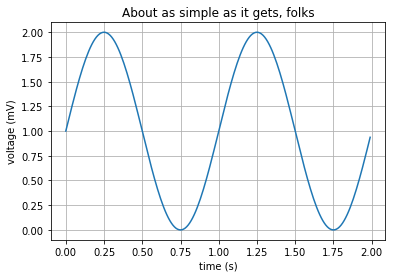

true

In [15]:
%matplotlib inline

main :-
    python_import( matplotlib.pyplot  as plt ),
    python_import( numpy  as np ),
    T = np.arange(0.0, 2.0, 0.01),
    S = 1 + np.sin(2*np.pi*T),
    plt.plot(T, S),
    plt.xlabel(`time (s)`),
    plt.ylabel(`voltage (mV)`),
    plt.title(`About as simple as it gets, folks`),
    plt.grid(true),
    plt.savefig("test2.png"),
    plt.show().

main 

reconsulting $stream(3)...
reconsulted fmem in module user, 3 msec 3888 bytes
/usr/local/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/Users/vsc/Library/Python/3.7/lib/python/site-packages/yap4py/yapi.py:87: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  if self.next():


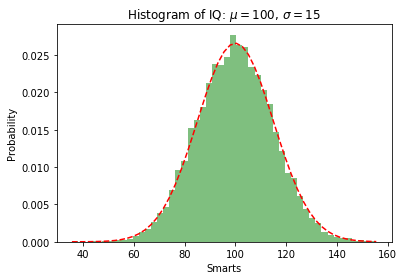

true

In [17]:
%matplotlib inline

main2 :-
    python_import( numpy as np ),
    python_import( matplotlib.mlab as mlab ),
    python_import( matplotlib.pyplot as plt ),

    /* example data */
    Mu = 100,  /* mean of distribution, */
    Sigma = 15,  /* standard deviation of distribution, */
    X = Mu + Sigma * np.random.randn(10000),
    NumBins = 50,
    /* the histogram of the data */
    t(n, bins, patches) := plt.hist(X, NumBins, normed=1, facecolor= `green`, alpha=0.5),
    /* add a `best fit` line */
    y := mlab.normpdf(bins, Mu, Sigma),
    plt.plot(bins, y, 'r--'),
    plt.xlabel('Smarts'),
    plt.ylabel('Probability'),
    plt.title('Histogram of IQ: $\\mu=100$, $\\sigma=15$'),
    /* Tweak spacing to prevent clipping of ylabel, */
    plt.show().
   
   main2


Last, Prolog can talk to R, so you can get a Python to R bridge

In [19]:
:- [library(real)].

X <- c(1:10), x := X

reconsulting $stream(3)...
 % consulting library(real)...
 % consulted /Users/vsc/.local/share/Yap/real.pl in module real, 46 msec -7960
reconsulted fmem in module user, 61 msec -7200
X = [1,2,3,4,5,6,7,8,9,10]


Next, let us use this bridge: